2.	Напишите программный код в виде функции, реализующий проверку описанной в пособии гипотезы о стрельбе. Параметры гипотезы и ее проверки (число испытаний, число промахов, вероятность промаха по нулевой гипотезе, по альтернативной гипотезе, уровень значимости и желаемая мощность проверки) сделайте вводимыми параметрами.

In [1]:
from math import comb
#Вероятность получить k успехов
def kf_binomial(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p) ** (n - k)) #Реализация биномиального коефициента

#Эксперимент
def test(n, k,  p0 = 0.1, alpha = 0.05):
    #Вероятность наблюдаемого
    p_obs = kf_binomial(n, k, p0)
    #Суума всехисходов эксперимента
    probs = [kf_binomial(n, i, p0) for i in range(n + 1)]
    p_test = sum(p for p in probs if p <= p_obs + 1e-15)

    print(f"Нулевая гипотеза: p = {p0}")
    print(f"Число промахов: {k} из {n}")
    print(f"p_test = {p_test:.3f}")

    if p_test < alpha:
        print("Отвергаем")
    else:
        print("Нет оснований отвергать")
    return p_test

test(n = 100, k = 12, p0=0.2, alpha=0.05)

Нулевая гипотеза: p = 0.2
Число промахов: 12 из 100
p_test = 0.045
Отвергаем


0.045348959953569676

Определите предельное число промахов (сверху и снизу) для заданного уровня значимости. Как это число зависит от уровня значимости? Почему так?

In [ ]:
from math import comb

#Вероятность получить k промахов
def binom(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

#Кумулятивная вероятность
def ctf(n, k, p):
    return sum(binom(n, i, p) for i in range(0, k + 1))

#Поиск критических границ
#низняя граница
def find_critical_bonus(n, p0 = 0.2, alpha = 0.05):
    k_low = 0
    while ctf(n, k_low, p0) < alpha / 2:
        k_low += 1
    
    #Верхняя граница
    k_high = n
    while(1 - ctf(n, k_high - 1, p0)) < alpha / 2:
        k_high -= 1
    return k_low, k_high

#Запуск
n = 100
p0 = 0.2
for alpha in [0.1, 0.05, 0.01]:
    low, high = find_critical_bonus(n, p0, alpha)
    print(f"alpha = {alpha}: границы [{low}, {high}]")

alpha = 0.1: границы [14, 27]
alpha = 0.05: границы [12, 28]
alpha = 0.01: границы [10, 31]


4.	Определите мощность проверки для заданных параметров нулевой и альтернативной гипотез. Как можно влиять на мощность проверки?

In [2]:
from math import comb

#Биномиальный коефициент

def binom_pmf(n, k, p):
    
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binom_cdf(n, k, p):
   
    return sum(binom_pmf(n, i, p) for i in range(0, k+1))

#Критические границы

def critical_bounds(n, p0, alpha=0.05):
   
    # Нижняя граница: вероятность слишком малого числа промахов
    k_low = 0
    while binom_cdf(n, k_low, p0) < alpha/2:
        k_low += 1

    # Верхняя граница: вероятность слишком большого числа промахов
    k_high = n
    while (1 - binom_cdf(n, k_high-1, p0)) < alpha/2:
        k_high -= 1

    return k_low, k_high

# Мощность теста

def test_power(n, p0, p1, alpha=0.05):

    # Находим критическую область
    k_low, k_high = critical_bounds(n, p0, alpha)

    # Вероятность попасть в критическую область при p = p1
    power_low = binom_cdf(n, k_low, p1)          # слишком мало промахов
    power_high = 1 - binom_cdf(n, k_high-1, p1)  # слишком много промахов
    power = power_low + power_high

    return k_low, k_high, power


#Запуск
n = 100     # число выстрелов
p0 = 0.2    # вероятность промаха по нулевой гипотезе
p1 = 0.25   # вероятность промаха по альтернативе
alpha = 0.05  # уровень значимости

k_low, k_high, power = test_power(n, p0, p1, alpha)

print(f"Нулевая гипотеза: p0 = {p0}")
print(f"Альтернативная гипотеза: p1 = {p1}")
print(f"Критическая область: X ≤ {k_low} или X ≥ {k_high}")
print(f"Мощность теста при n={n}, alpha={alpha}: {power:.3f}")


Нулевая гипотеза: p0 = 0.2
Альтернативная гипотеза: p1 = 0.25
Критическая область: X ≤ 12 или X ≥ 28
Мощность теста при n=100, alpha=0.05: 0.279


5.	Задана числовая последовательность 1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2. Проверьте гипотезу о том, что последовательность аппроксимируется экспоненциальной функцией по уровню значимости 5%. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     18.77
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           0.000514
Time:                        20:11:56   Log-Likelihood:                -17.286
No. Observations:                  18   AIC:                             38.57
Df Residuals:                      16   BIC:                             40.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7181      0.330      2.178      0.0

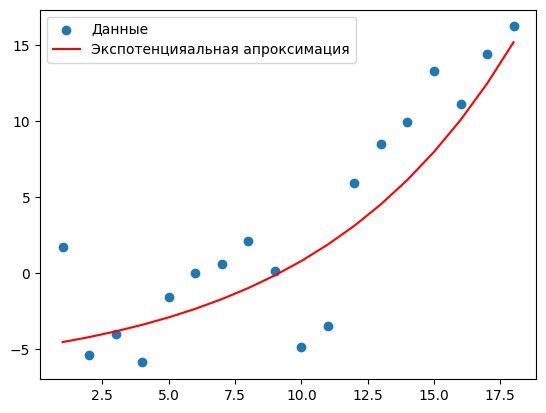

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Данные по условию задачи
y = np.array([1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1,
              -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2])

x = np.arange(1, len(y) + 1)
#Сдвиг вверх, чтобы все стали положительными
shift = abs(min(y)) + 1
y_shifted = y + shift

ln_y = np.log(y_shifted)

#линейная регрессия
X = sm.add_constant(x)
model = sm.OLS(ln_y, X).fit()
print(model.summary())

#Апроксимация
a = np.exp(model.params[0]) / np.exp(0 * model.params[1])
b = model.params[1]
y_fit = a * np.exp(b * x) - shift

#график
plt.scatter(x, y, label = "Данные")
plt.plot(x, y_fit, 'r', label = "Экспотенцияальная апроксимация")
plt.legend()
plt.show()

На предыдущей числовой последовательности проверьте гипотезу об аппроксимации полиномиальной функцией 4-го порядка с тем же уровнем значимости. 


Коэффициенты полинома (степени 4..0): [-5.14823154e-04  1.51973815e-02 -1.67999656e-02 -6.64761912e-01
 -7.88888889e-01]
R^2 = 0.8328, скорректированный R^2 = 0.7814
F = 16.1925, p-value = 0.000057
👉 Гипотеза о том, что модель не объясняет зависимость, отвергается.
Модель полинома 4-го порядка статистически значима.

Таблица наблюдений и предсказаний:
     x  y_obs  y_pred  residual
0    1    1.7  -1.456     3.156
1    2   -5.4  -2.072    -3.328
2    3   -4.0  -2.566    -1.434
3    4   -5.9  -2.876    -3.024
4    5   -1.6  -2.955     1.355
5    6    0.0  -2.767     2.767
6    7    0.6  -2.289     2.889
7    8    2.1  -1.510     3.610
8    9    0.1  -0.431     0.531
9   10   -4.9   0.933    -5.833
10  11   -3.5   2.556    -6.056
11  12    5.9   4.400     1.500
12  13    8.5   6.415     2.085
13  14    9.9   8.536     1.364
14  15   13.3  10.688     2.612
15  16   11.1  12.783    -1.683
16  17   14.4  14.721    -0.321
17  18   16.2  16.389    -0.189


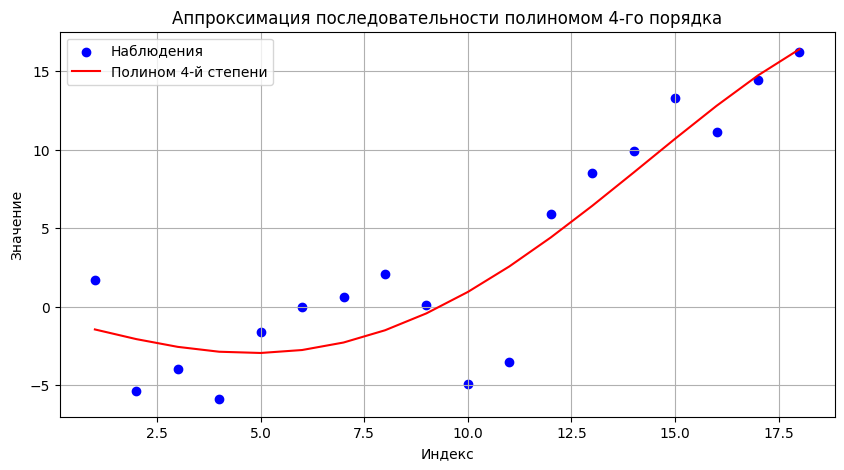

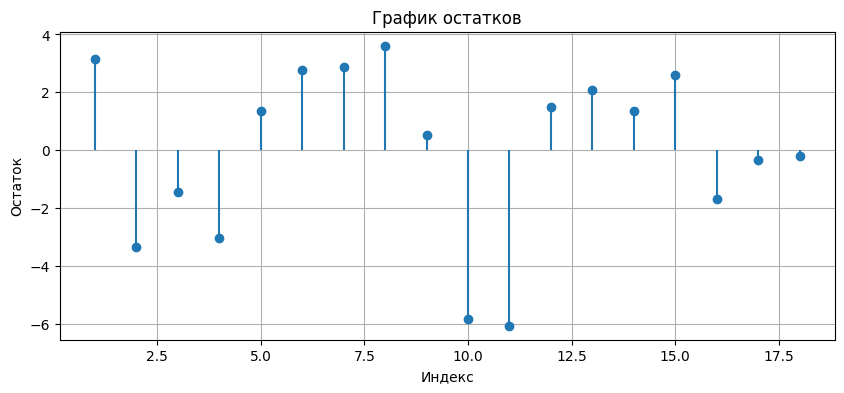

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

#Последовательность
y = np.array([1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1,
              0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1,
              14.4, 16.2])

n = len(y)                  # количество наблюдений
x = np.arange(1, n+1)       # используем индексы 1..n как независимую переменную

#Подгонка полинома
deg = 4
coeffs = np.polyfit(x, y, deg)   # вычисляем коэффициенты полинома
p = np.poly1d(coeffs)            # создаём полином
y_pred = p(x)                    # предсказанные значения

#Рассчитаем суммы квадратов
y_mean = np.mean(y)
SST = np.sum((y - y_mean)**2)       # общая дисперсия (total sum of squares)
SSR = np.sum((y_pred - y_mean)**2)  # объяснённая дисперсия (regression sum)
SSE = np.sum((y - y_pred)**2)       # остаточная дисперсия (residual sum)

# === 4. F-тест общей значимости модели ===
k = deg                  # число предикторов (x, x^2, x^3, x^4)
df_reg = k               # степени свободы для регрессии
df_res = n - (k + 1)     # степени свободы для остатков (минус свободный член)
MSR = SSR / df_reg       # средний квадрат регрессии
MSE = SSE / df_res       # средний квадрат ошибки
F_stat = MSR / MSE       # F-статистика
p_value = stats.f.sf(F_stat, df_reg, df_res)  # p-value (правосторонняя область)

#Коефициенты детерминации
R2 = SSR / SST
adjR2 = 1 - (1 - R2) * (n - 1) / (n - (k + 1))

#Вывод
alpha = 0.05  # уровень значимости
print("Коэффициенты полинома (степени 4..0):", coeffs)
print(f"R^2 = {R2:.4f}, скорректированный R^2 = {adjR2:.4f}")
print(f"F = {F_stat:.4f}, p-value = {p_value:.6f}")
if p_value < alpha:
    print("👉 Гипотеза о том, что модель не объясняет зависимость, отвергается.")
    print("Модель полинома 4-го порядка статистически значима.")
else:
    print("👉 Нет оснований отвергнуть нулевую гипотезу.")
    print("Модель полинома 4-го порядка не является статистически значимой.")

#Наблюдения
df = pd.DataFrame({
    "x": x,
    "y_obs": y,
    "y_pred": np.round(y_pred, 3),
    "residual": np.round(y - y_pred, 3)
})
print("\nТаблица наблюдений и предсказаний:")
print(df)

#График
plt.figure(figsize=(10,5))
plt.scatter(x, y, label="Наблюдения", color="blue")
plt.plot(x, y_pred, label="Полином 4-й степени", color="red")
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.title("Аппроксимация последовательности полиномом 4-го порядка")
plt.legend()
plt.grid(True)
plt.show()

# График остатков
plt.figure(figsize=(10,4))
plt.stem(x, y - y_pred, basefmt=" ")
plt.xlabel("Индекс")
plt.ylabel("Остаток")
plt.title("График остатков")
plt.grid(True)
plt.show()



7. Рассчитайте мощность проверки для лучшей функции по сравнению с худшей (по пп. 5 и 6). То есть, лучшую аппроксимацию принимайте за нулевую гипотезу, а худшую – за альтернативную. 

Исходные SSE: best(pol4) = 152.3332, worst(exp) = 203.0839
Оценки sigma: sigma_best = 3.4231, sigma_worst = 3.3441
Симуляций при H0: запрошено 5000, реально учтено 5000, пропущено 0
Критическое значение T_crit (уровень 0.05): 140.8473
Симуляций при H1: запрошено 5000, реально учтено 5000, пропущено 0

Оценка мощности теста (H0 = полином 4, H1 = экспонента): power ≈ 0.0050


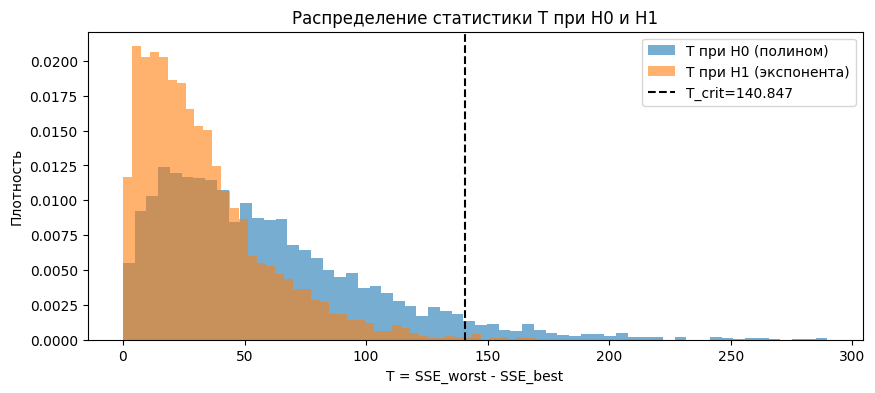

In [6]:
import numpy as np
import statsmodels.api as sm
from scipy import optimize
from scipy import stats
import matplotlib.pyplot as plt

#Данные
y = np.array([1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1,
              -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2])
x = np.arange(1, len(y) + 1)
n = len(y)

#двиг для экспоненты
shift = abs(min(y)) + 1
y_shifted = y + shift
ln_y = np.log(y_shifted)

#подгонка лучшей модели: полином 4-й степени (H0)
deg_best = 4
coeffs_best = np.polyfit(x, y, deg_best)
p_best = np.poly1d(coeffs_best)
y_pred_best = p_best(x)
resid_best = y - y_pred_best
SSE_best_data = np.sum(resid_best**2)
# оценка шума при H0
sigma_best = np.std(resid_best, ddof=deg_best+1)

# подгонка худшей модели: экспонента (H1)
# лог-линейная подгонка, как в твоём коде
X = sm.add_constant(x)
model_ln = sm.OLS(ln_y, X).fit()
c_hat = model_ln.params[0]
b_hat = model_ln.params[1]
a_hat = np.exp(c_hat)
# функция прогнозирования худшей модели (фиксируем shift)
def p_worst_func(x_arr, a, b):
    return a * np.exp(b * x_arr) - shift

p_worst = lambda xx: a_hat * np.exp(b_hat * xx) - shift
y_pred_worst = p_worst(x)
resid_worst = y - y_pred_worst
SSE_worst_data = np.sum(resid_worst**2)
# оценка шума при H1 (по остаткам экспоненты)
sigma_worst = np.std(resid_worst, ddof=2)  # ddof=2: оценка для a и b

print("Исходные SSE: best(pol4) = {:.4f}, worst(exp) = {:.4f}".format(SSE_best_data, SSE_worst_data))
print("Оценки sigma: sigma_best = {:.4f}, sigma_worst = {:.4f}".format(sigma_best, sigma_worst))

#вспомогательная функция: подгоняет обе модели к данным y_sim и возвращает T = SSE_w - SSE_b
def fit_both_and_stat(x_arr, y_sim):
    # 1) полином 4-й степени (переподгонка)
    coeffs_b = np.polyfit(x_arr, y_sim, deg_best)
    p_b = np.poly1d(coeffs_b)
    SSE_b = np.sum((y_sim - p_b(x_arr))**2)

    # 2) экспонента — подгоняем нелинейно: y = a*exp(b*x) - shift
    # начальные приближения: используем исходные a_hat, b_hat
    try:
        popt, _ = optimize.curve_fit(lambda xx, a, b: a * np.exp(b * xx) - shift,
                                     x_arr, y_sim, p0=[a_hat, b_hat], maxfev=10000)
        a_fit, b_fit = popt
        y_w = a_fit * np.exp(b_fit * x_arr) - shift
        SSE_w = np.sum((y_sim - y_w)**2)
    except Exception as e:
        # если подгонка экспоненты не удалась — возвращаем None, симуляция пропускается
        return None

    return SSE_w - SSE_b

#параметры симуляции
alpha = 0.05
n_sim = 5000
rng = np.random.default_rng(12345)

#симуляции при H0: генерируем из полинома (лучшая модель) с шумом sigma_best
T_H0 = []
skipped_H0 = 0
for i in range(n_sim):
    y_sim = p_best(x) + rng.normal(0, sigma_best, size=n)
    stat = fit_both_and_stat(x, y_sim)
    if stat is None:
        skipped_H0 += 1
        continue
    T_H0.append(stat)
T_H0 = np.array(T_H0)
print(f"Симуляций при H0: запрошено {n_sim}, реально учтено {len(T_H0)}, пропущено {skipped_H0}")

# критическое значение (1-alpha квантиль распределения T при H0)
T_crit = np.quantile(T_H0, 1 - alpha)
print(f"Критическое значение T_crit (уровень {alpha}): {T_crit:.4f}")

#симуляции при H1: генерируем из экспоненты (худшая модель) с шумом sigma_worst
T_H1 = []
skipped_H1 = 0
for i in range(n_sim):
    y_sim = p_worst(x) + rng.normal(0, sigma_worst, size=n)
    stat = fit_both_and_stat(x, y_sim)
    if stat is None:
        skipped_H1 += 1
        continue
    T_H1.append(stat)
T_H1 = np.array(T_H1)
print(f"Симуляций при H1: запрошено {n_sim}, реально учтено {len(T_H1)}, пропущено {skipped_H1}")

# мощность: доля T_H1 > T_crit
power = np.mean(T_H1 > T_crit)
print(f"\nОценка мощности теста (H0 = полином 4, H1 = экспонента): power ≈ {power:.4f}")

#опционально: посмотреть гистограммы T_H0 и T_H1
plt.figure(figsize=(10,4))
plt.hist(T_H0, bins=60, alpha=0.6, label='T при H0 (полином)', density=True)
plt.hist(T_H1, bins=60, alpha=0.6, label='T при H1 (экспонента)', density=True)
plt.axvline(T_crit, color='k', linestyle='--', label=f'T_crit={T_crit:.3f}')
plt.legend()
plt.xlabel('T = SSE_worst - SSE_best')
plt.ylabel('Плотность')
plt.title('Распределение статистики T при H0 и H1')
plt.show()


Отделите последние четыре значения от выборки в п. 5. К полученной выборке примените полиномиальную аппроксимацию 7 порядка. Посчитайте 𝑝-значение. 


In [7]:
import numpy as np
from scipy import stats

#Исходные данные
y_full = ([1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1,
                   0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1,
                   14.4, 16.2])

#только первые 14 значенийй
y = y_full[:-4]
n = len(y)
x = np.arange(1, n + 1)

#Подгонка полинома 7 степени
deg = 7
coefficients = np.polyfit(x, y, deg)
p = np.poly1d(coefficients)
y_pred = p(x)

#Сумма квадратов
y_mean = np.mean(y)
SST = np.sum((y - y_mean)**2)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum((y - y_pred)**2)

#Данные для запуска
k = deg
df_reg = k
df_res = n - (k + 1)
MSR = SSR / df_reg
MSE = SSE / df_res
F_start = MSR / MSE
p_value = stats.f.sf(F_start, df_reg, df_res)

#Вывод
print(f"Количество наблюдений: {n}")
print(f"Степень полинома: {deg}")
print(f"SST = {SST:.4f}, SSR = {SSR:.4f}, SSE = {SSE:.4f}")
print(f"F = {F_start:.4f}, p_value = {p_value:.6f}")

Количество наблюдений: 14
Степень полинома: 7
SST = 330.6550, SSR = 302.9419, SSE = 27.7131
F = 9.3697, p_value = 0.007231


Посчитайте то же самое на той же функции, но с полной выборкой. Почему 𝑝-значение резко уменьшилось?

In [8]:
import numpy as np
from scipy import stats

#Данные
y_full = np.array([1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1,
                   0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1,
                   14.4, 16.2])

#Функция для расчета полинома
def polinom(x, y, deg):
    n = len(y)
    coefficients = np.polyfit(x, y, deg)
    p = np.poly1d(coefficients)
    y_pred = (x)
    y_mean = np.mean(y)
    SST = np.sum((y - y_mean)**2)
    SSR = np.sum((y_pred - y_mean)**2)
    SSE = np.sum((y - y_pred)**2)
    
    k = deg
    df_reg = k
    df_res = n - (k + 1)
    
    MSR = SSR / df_reg
    MSE = SSE / df_res
    F_stat = MSR / MSE
    p_value = stats.f.sf(F_stat, df_reg, df_res)
    
    return {
        "n": n, "deg": deg, "SST": SST, "SSR": SSR, "SSE": SSE,
        "F": F_stat, "p_value": p_value
    }

#Выборка 14 первых элементов
y14 = y_full[:-4]
x14 = np.arange(1, len(y14)+1)
res14 = polinom(x14, y14, deg=7)

#олная выборка
x18 = np.arange(1, len(y_full)+1)
res18 = polinom(x18, y_full, deg=7)

# Вывод результатов
print("Полином 7-й степени:")
print("Первые 14 точек: F = {:.3f}, p-value = {:.6f}".format(res14["F"], res14["p_value"]))
print("Все 18 точек   : F = {:.3f}, p-value = {:.6f}".format(res18["F"], res18["p_value"]))

Полином 7-й степени:
Первые 14 точек: F = 0.875, p-value = 0.572830
Все 18 точек   : F = 1.731, p-value = 0.208003
